# Pandas
Pandas 是 Python 的核心数据分析支持库，提供了快速、灵活、明确的数据结构，旨在简单、直观地处理关系型、标记型数据。Pandas 的目标是成为 Python 数据分析实践与实战的必备高级工具，其长远目标是成为最强大、最灵活、可以支持任何语言的开源数据分析工具。经过多年不懈的努力，Pandas 离这个目标已经越来越近了。

Pandas 的主要数据结构是 Series（一维数据）与 DataFrame（二维数据），这两种数据结构足以处理金融、统计、社会科学、工程等领域里的大多数典型用例。

### Pandas 就像一把万能瑞士军刀，下面仅列出了它的部分优势 ：

处理浮点与非浮点数据里的缺失数据，表示为 NaN；

大小可变：插入或删除 DataFrame 等多维对象的列；

自动、显式数据对齐：显式地将对象与一组标签对齐，也可以忽略标签，在 Series、DataFrame 计算时自动与数据对齐；

强大、灵活的分组（group by）功能：拆分-应用-组合数据集，聚合、转换数据；

把 Python 和 NumPy 数据结构里不规则、不同索引的数据轻松地转换为 DataFrame 对象；

基于智能标签，对大型数据集进行切片、花式索引、子集分解等操作；

直观地合并（merge）、连接（join）数据集；

灵活地重塑（reshape）、透视（pivot）数据集；

轴支持结构化标签：一个刻度支持多个标签；

成熟的 IO 工具：读取文本文件（CSV 等支持分隔符的文件）、Excel 文件、数据库等来源的数据，利用超快的 HDF5 格式保存 / 加载数据；

时间序列：支持日期范围生成、频率转换、移动窗口统计、移动窗口线性回归、日期位移等时间序列功能。

## 生成对象

In [3]:
import numpy as np
import pandas as pd

### 生成Series

In [18]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### 用含日期时间索引与标签的 NumPy 数组生成 DataFrame：

In [5]:
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.709539 -0.341790  2.836386 -0.786879
2013-01-02  1.675770 -0.524738 -0.575516  0.900208
2013-01-03  0.184591  0.162533 -1.991671 -0.988049
2013-01-04 -0.488642  0.550585 -0.454073 -0.373032
2013-01-05  0.275919  0.502770 -0.793400  0.647785
2013-01-06 -0.241352  1.576005 -0.145363  0.335682


### 用 Series 字典对象生成 DataFrame:

In [8]:
df2 = pd.DataFrame({'A': 1.,
                             'B': pd.to_datetime('20130102',format='%Y-%m-%d'),
                             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                             'D': np.array([3,3,3,3], dtype='int32'),
                             'E': pd.Series(["test", "train", "test", "train"]),
                             'F': 'foo'})
print(df2)
print(df2.dtypes)


     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
F            object
dtype: object


In [38]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.head(3))

                   A         B         C         D
2013-01-01 -1.091405  0.309179 -0.058518  0.298177
2013-01-02 -1.006007  0.644974  0.422254 -0.477572
2013-01-03 -0.081074 -1.926293  2.188508 -0.103502


In [39]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.tail(3))

                   A         B         C         D
2013-01-04 -1.185851 -1.490923 -0.789579  1.485007
2013-01-05  0.778822 -0.146754 -0.891747  0.543042
2013-01-06  0.985213  1.247656  1.239037 -0.337792


In [40]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [41]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


### DataFrame.to_numpy() 输出底层数据的 NumPy 对象。

注意，DataFrame 的列由多种数据类型组成时，该操作耗费系统资源较大，这也是 Pandas 和 NumPy 的本质区别：NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同。

下面的 df 这个 DataFrame 里的值都是浮点数，DataFrame.to_numpy() 的操作会很快，而且不复制数据。

In [42]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.to_numpy())

[[ 1.87592911 -0.3693373   0.6693284  -1.27903389]
 [-0.93042269  0.44748041 -0.7539966   1.19133735]
 [-0.67071683  0.61598585 -1.4072476  -0.21533267]
 [ 1.23742817 -0.60314337 -0.62851206 -0.54950727]
 [ 0.49602405 -0.51556925 -0.69895235 -0.08520349]
 [-0.97577176 -0.64414177  1.15567795 -0.46478848]]


df2 这个 DataFrame 包含了多种类型，DataFrame.to_numpy() 操作就会耗费较多资源。

In [9]:
df2 = pd.DataFrame({'A': 1.,
                             'B': pd.to_datetime('20130102',format='%Y-%m-%d'),
                             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                             'D': np.array([3,3,3,3], dtype='int32'),
                             'E': pd.Series(["test", "train", "test", "train"]),
                             'F': 'foo'})
print(df2.to_numpy())

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


### describe() 可以快速查看数据的统计摘要：

In [10]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.073748 -0.232930 -0.155807  0.299670
std    1.143636  0.811004  0.451076  0.835358
min   -1.385395 -1.169713 -0.753818 -0.916890
25%   -0.578085 -0.903124 -0.514257 -0.060465
50%   -0.410641 -0.270892 -0.012875  0.232216
75%    0.241103  0.469594  0.183747  0.751481
max    1.939736  0.711360  0.276822  1.483931


### 转置数据：

In [50]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)
print(df.T)

                   A         B         C         D
2013-01-01 -0.312033 -1.376513 -1.029000 -0.897852
2013-01-02  0.742277 -1.054327 -0.743012  0.325237
2013-01-03  0.733841  2.395040 -0.073338 -0.822928
2013-01-04  0.033510  0.652729 -0.756927  0.663468
2013-01-05 -0.637908  1.437460 -0.161054 -1.448035
2013-01-06 -1.025084  0.662849  0.923985  0.029649
   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.312033    0.742277    0.733841    0.033510   -0.637908   -1.025084
B   -1.376513   -1.054327    2.395040    0.652729    1.437460    0.662849
C   -1.029000   -0.743012   -0.073338   -0.756927   -0.161054    0.923985
D   -0.897852    0.325237   -0.822928    0.663468   -1.448035    0.029649


### 按轴排序：

In [52]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df = df.sort_index(axis=1, ascending=False) #axis=1, 按列名排序
print(df)

                   D         C         B         A
2013-01-01 -0.281787  1.726453 -0.417050 -0.005866
2013-01-02  0.415535 -1.721208 -1.370694  0.412784
2013-01-03 -0.558277 -0.650820 -0.244325 -0.791497
2013-01-04  1.096594  1.012647 -0.256957 -0.352192
2013-01-05 -0.368470 -0.686866  1.224056 -1.840544
2013-01-06  1.112427  0.999046 -1.980807 -0.095794


### 按值排序：

In [53]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df = df.sort_values(by='B')
print(df)

                   A         B         C         D
2013-01-06  1.283945 -0.777988 -1.701169  0.792409
2013-01-02  0.270849 -0.495233 -0.056265  0.236492
2013-01-01 -0.796027  0.143266 -0.433567  0.874485
2013-01-04 -1.083131  0.359276 -1.127634  0.039461
2013-01-03 -1.051326  0.398405 -0.509520  0.046623
2013-01-05 -3.222740  0.872441 -0.186973 -1.352750


## 选择

### 获取数据
选择单列，产生 Series，与 df.A 等效：

In [54]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df['A'])

2013-01-01    0.558239
2013-01-02   -1.078273
2013-01-03   -0.380741
2013-01-04   -1.297603
2013-01-05    0.310838
2013-01-06   -0.031661
Freq: D, Name: A, dtype: float64


### 用 [ ] 切片行：

In [56]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df[0:3])
print(df['20130101':'20130104'])

                   A         B         C         D
2013-01-01  0.270154 -0.282572 -1.148514 -1.618821
2013-01-02 -1.965419 -0.001487  2.354831  0.094445
2013-01-03 -1.648174 -1.181112 -0.581668 -0.486575
                   A         B         C         D
2013-01-01  0.270154 -0.282572 -1.148514 -1.618821
2013-01-02 -1.965419 -0.001487  2.354831  0.094445
2013-01-03 -1.648174 -1.181112 -0.581668 -0.486575
2013-01-04  0.781466  2.075522  0.375409 -1.774411


## 按标签选择

用标签提取一行数据：

In [58]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.loc[dates[0]]
print(df2)

A   -0.084660
B    1.125892
C    1.548108
D   -0.818318
Name: 2013-01-01 00:00:00, dtype: float64


用标签选择多列数据：

In [59]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.loc[:, ['A', 'B']]
print(df2)

                   A         B
2013-01-01 -0.499316  0.429204
2013-01-02  1.136238 -1.097927
2013-01-03 -0.643321 -0.639839
2013-01-04  0.076686  1.337466
2013-01-05  0.502435  0.347359
2013-01-06 -0.998933  1.045618


用标签切片，包含行与列结束点：

In [60]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.loc['20130102':'20130104', ['A', 'B']]
print(df2)

                   A         B
2013-01-02  0.924837 -0.028046
2013-01-03  0.624350  0.019475
2013-01-04  0.366672 -0.148962


返回对象降维：

In [61]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.loc['20130102', ['A', 'B']]
print(df2)

A    1.382389
B   -0.284478
Name: 2013-01-02 00:00:00, dtype: float64


提取标量值：

In [68]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.loc[dates[0], 'A']
print(df2)

-0.4323551143717852


快速访问标量，与上述方法等效：

In [11]:
df2 = df.at[dates[0], 'A']
print(df2)

-0.5562230529387123


## 按位置选择

用整数位置选择：

In [12]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[3]
print(df)
print(df2)

                   A         B         C         D
2013-01-01 -0.107984 -0.149686  0.180313 -0.082615
2013-01-02  0.049783 -2.407399  0.556737 -0.552114
2013-01-03 -1.713821 -0.573406  2.653924  0.147176
2013-01-04  0.568678  0.821943 -0.409147 -1.403023
2013-01-05  0.743408  1.172106  0.347119  0.646678
2013-01-06 -1.340088  1.042089  1.953163  0.582042
A    0.568678
B    0.821943
C   -0.409147
D   -1.403023
Name: 2013-01-04 00:00:00, dtype: float64


类似 NumPy / Python，用整数切片：

In [71]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[3:5, 0:2]
print(df2)

                   A         B
2013-01-04  0.508481 -0.332345
2013-01-05 -0.403236  0.543780


类似 NumPy / Python，用整数列表按位置切片：

In [72]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[[1, 2, 4], [0, 2]]
print(df2)

                   A         C
2013-01-02  1.146820 -0.410189
2013-01-03  0.016278 -1.279120
2013-01-05 -2.562964 -1.311953


显式整行切片：

In [73]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[1:3, :]
print(df2)

                   A        B         C         D
2013-01-02 -1.287683  3.24312 -1.240704  1.906398
2013-01-03 -1.097102  1.04735  1.599690 -0.528318


显式整列切片：

In [74]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[:, 1:3]
print(df2)

                   B         C
2013-01-01  0.682682  0.462113
2013-01-02 -0.009078 -0.248020
2013-01-03 -1.391195  1.373124
2013-01-04 -0.907918 -0.506955
2013-01-05  0.431752  1.653101
2013-01-06 -0.023634 -0.696959


显式提取值：

In [76]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.iloc[1, 1]
# 快速访问标量，与上述方法等效：
df3 = df.iat[1, 1]
print(df2)
print(df3)

-0.13269127721148
-0.13269127721148


## 布尔索引

用单列的值选择数据：

In [77]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df[df.A > 0]
print(df2)

                   A         B         C         D
2013-01-01  0.951775 -0.292995 -0.692740 -0.437805
2013-01-04  0.747989  0.282069 -0.340695 -0.530456


In [80]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df[df> 0]
print(df2)

                   A        B         C         D
2013-01-01       NaN      NaN  1.115742  0.291086
2013-01-02  0.525828      NaN  0.705587       NaN
2013-01-03  0.037575  2.30600       NaN       NaN
2013-01-04  0.528000      NaN  0.066435  1.209076
2013-01-05       NaN      NaN  0.330465       NaN
2013-01-06       NaN  0.20398       NaN  0.310286


用 isin() 筛选：

In [81]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)

                   A         B         C         D      E
2013-01-01  0.525352 -1.438305  0.921197  0.740837    one
2013-01-02 -0.017533 -0.712584 -0.430119 -1.859848    one
2013-01-03 -0.109801  1.448841 -0.861400  0.763788    two
2013-01-04 -0.502081  0.142156  1.554487 -0.458593  three
2013-01-05 -0.284375 -1.140886  0.724695  0.773047   four
2013-01-06  0.165440  0.982993 -2.956236  0.215586  three


In [82]:
df3 = df2[df2['E'].isin(['two', 'four'])]
print(df3)

                   A         B         C         D     E
2013-01-03 -0.109801  1.448841 -0.861400  0.763788   two
2013-01-05 -0.284375 -1.140886  0.724695  0.773047  four


## 赋值
用索引自动对齐新增列的数据：

In [15]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
print(s1)
df['F'] = s1
#按 NumPy 数组赋值：
df.loc[:, 'D'] = np.array([5] * len(df))
print(df)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
                   A         B         C  D    F
2013-01-01 -1.477081 -0.869327 -0.064885  5  NaN
2013-01-02  1.363878  0.074561  0.845064  5  1.0
2013-01-03 -0.342781 -1.110472  0.052391  5  2.0
2013-01-04 -0.365749  0.827208  0.410617  5  3.0
2013-01-05  0.772678 -0.175467  1.524044  5  4.0
2013-01-06 -0.524863 -0.402278 -2.014076  5  5.0


用 where 条件赋值：

In [93]:
df2 = df.copy()
df2[df2 > 0] = -df2
print(df2)

                   A         B         C  D    F
2013-01-01 -0.615879 -0.226821 -0.227379 -5  NaN
2013-01-02 -0.484501 -0.702626 -0.730854 -5 -1.0
2013-01-03 -1.279119 -0.759156 -0.127237 -5 -2.0
2013-01-04 -1.257741 -0.145882 -0.483802 -5 -3.0
2013-01-05 -1.089981 -0.073687 -2.339642 -5 -4.0
2013-01-06 -1.365510 -0.213246 -0.235426 -5 -5.0


## 缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。详见缺失数据。

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。

In [98]:
print(df)
dates = pd.date_range('20130101', periods=6)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
print(df1)

                   A         B         C  D    F
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN
2013-01-02  0.484501 -0.702626  0.730854  5  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0
2013-01-05 -1.089981 -0.073687 -2.339642  5  4.0
2013-01-06 -1.365510  0.213246 -0.235426  5  5.0
                   A         B         C  D    F    E
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN  1.0
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0  NaN
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0  NaN


删除所有含缺失值的行：

In [100]:
print(df1)
df2 = df1.dropna(how='any')
print(df2)

                   A         B         C  D    F    E
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN  1.0
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0  NaN
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0  NaN
                   A         B         C  D    F    E
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0


填充缺失值：

In [101]:
print(df1)
df2 = df1.fillna(value=5)
print(df2)

                   A         B         C  D    F    E
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN  1.0
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0  NaN
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0  NaN
                   A         B         C  D    F    E
2013-01-01 -0.615879 -0.226821  0.227379  5  5.0  1.0
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0  5.0
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0  5.0


提取 nan 值的布尔掩码：

In [102]:
print(df1)
df2 = pd.isna(df1)
print(df2)

                   A         B         C  D    F    E
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN  1.0
2013-01-02  0.484501 -0.702626  0.730854  5  1.0  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0  NaN
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0  NaN
                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


## 运算

### 统计
一般情况下，运算时排除缺失值。

In [104]:
print(df)
df2 = df.mean()
print(df2)

                   A         B         C  D    F
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN
2013-01-02  0.484501 -0.702626  0.730854  5  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0
2013-01-05 -1.089981 -0.073687 -2.339642  5  4.0
2013-01-06 -1.365510  0.213246 -0.235426  5  5.0
A   -0.853955
B   -0.233860
C   -0.371312
D    5.000000
F    3.000000
dtype: float64


在另一个轴(即，行)上执行同样的操作：

In [17]:
print(df)
df2 = df.mean(1)
print(df2)

                   A         B         C  D    F
2013-01-01 -1.477081 -0.869327 -0.064885  5  NaN
2013-01-02  1.363878  0.074561  0.845064  5  1.0
2013-01-03 -0.342781 -1.110472  0.052391  5  2.0
2013-01-04 -0.365749  0.827208  0.410617  5  3.0
2013-01-05  0.772678 -0.175467  1.524044  5  4.0
2013-01-06 -0.524863 -0.402278 -2.014076  5  5.0
2013-01-01    0.647177
2013-01-02    1.656701
2013-01-03    1.119828
2013-01-04    1.774415
2013-01-05    2.224251
2013-01-06    1.411756
Freq: D, dtype: float64


不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播。

In [108]:
print(dates)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
print(s)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


### Apply 函数
Apply 函数处理数据：

In [110]:
print(df)
df2 = df.apply(np.cumsum)  #按行累加
print(df2)

                   A         B         C  D    F
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN
2013-01-02  0.484501 -0.702626  0.730854  5  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0
2013-01-05 -1.089981 -0.073687 -2.339642  5  4.0
2013-01-06 -1.365510  0.213246 -0.235426  5  5.0
                   A         B         C   D     F
2013-01-01 -0.615879 -0.226821  0.227379   5   NaN
2013-01-02 -0.131378 -0.929447  0.958233  10   1.0
2013-01-03 -1.410497 -1.688603  0.830996  15   3.0
2013-01-04 -2.668238 -1.542722  0.347194  20   6.0
2013-01-05 -3.758219 -1.616408 -1.992448  25  10.0
2013-01-06 -5.123729 -1.403163 -2.227874  30  15.0


In [111]:
print(df)
df2 = df.apply(lambda x: x.max() - x.min())
print(df2)

                   A         B         C  D    F
2013-01-01 -0.615879 -0.226821  0.227379  5  NaN
2013-01-02  0.484501 -0.702626  0.730854  5  1.0
2013-01-03 -1.279119 -0.759156 -0.127237  5  2.0
2013-01-04 -1.257741  0.145882 -0.483802  5  3.0
2013-01-05 -1.089981 -0.073687 -2.339642  5  4.0
2013-01-06 -1.365510  0.213246 -0.235426  5  5.0
A    1.850011
B    0.972402
C    3.070495
D    0.000000
F    4.000000
dtype: float64


In [114]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())

0    2
1    1
2    3
3    5
4    1
5    2
6    5
7    6
8    0
9    1
dtype: int64
1    3
5    2
2    2
6    1
3    1
0    1
dtype: int64


### 字符串方法
Series 的 str 属性包含一组字符串处理功能，如下列代码所示。

In [115]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s)
print(s.str.lower())

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object
0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并（Merge）

### 结合（Concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

In [118]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

          0         1         2         3
0  1.719113  0.831383  1.538818 -1.999142
1  0.593740 -0.057504 -0.461567 -1.048546
2  0.380137  0.548541 -2.590405 -1.164587
3 -2.744919 -2.532682 -0.970706 -0.562539
4  0.952377 -0.886799 -0.734037  0.123196
5 -0.043676 -0.289858  0.432466 -1.093002
6  1.421915  0.644543  0.215564  0.027258
7 -1.734566  1.234567  2.341220 -1.170683
8  0.419772  1.229119 -1.481118 -0.572200
9  1.282092 -0.527682  1.252824  0.979524


In [120]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.719113  0.831383  1.538818 -1.999142
 1  0.593740 -0.057504 -0.461567 -1.048546
 2  0.380137  0.548541 -2.590405 -1.164587,
           0         1         2         3
 3 -2.744919 -2.532682 -0.970706 -0.562539
 4  0.952377 -0.886799 -0.734037  0.123196
 5 -0.043676 -0.289858  0.432466 -1.093002
 6  1.421915  0.644543  0.215564  0.027258,
           0         1         2         3
 7 -1.734566  1.234567  2.341220 -1.170683
 8  0.419772  1.229119 -1.481118 -0.572200
 9  1.282092 -0.527682  1.252824  0.979524]

In [121]:
df2 = pd.concat(pieces)
print(df2)

          0         1         2         3
0  1.719113  0.831383  1.538818 -1.999142
1  0.593740 -0.057504 -0.461567 -1.048546
2  0.380137  0.548541 -2.590405 -1.164587
3 -2.744919 -2.532682 -0.970706 -0.562539
4  0.952377 -0.886799 -0.734037  0.123196
5 -0.043676 -0.289858  0.432466 -1.093002
6  1.421915  0.644543  0.215564  0.027258
7 -1.734566  1.234567  2.341220 -1.170683
8  0.419772  1.229119 -1.481118 -0.572200
9  1.282092 -0.527682  1.252824  0.979524


### 连接（join）

In [122]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [124]:
df2 = pd.merge(left, right, on='key')
print(df2)

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


这里还有一个例子：

In [125]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


In [126]:
df2 = pd.merge(left, right, on='key')
print(df2)

   key  lval  rval
0  foo     1     4
1  bar     2     5


### 追加（Append）

In [127]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
0  0.758133  1.590516  0.914071  0.772167
1 -0.986839  1.955776  0.555850  0.403149
2 -0.020167 -1.443294  0.226568 -0.891848
3 -0.922829 -1.732566 -0.375818 -0.751083
4 -0.045678 -0.855114  1.554086 -0.943969
5  0.576713  1.791557  1.763334 -0.073638
6  0.583431  1.345461  0.761219  0.181475
7  0.181882 -1.421653  0.552111  1.384075


In [128]:
s = df.iloc[3]
df2 = df.append(s, ignore_index=True)
print(df2)

          A         B         C         D
0  0.758133  1.590516  0.914071  0.772167
1 -0.986839  1.955776  0.555850  0.403149
2 -0.020167 -1.443294  0.226568 -0.891848
3 -0.922829 -1.732566 -0.375818 -0.751083
4 -0.045678 -0.855114  1.554086 -0.943969
5  0.576713  1.791557  1.763334 -0.073638
6  0.583431  1.345461  0.761219  0.181475
7  0.181882 -1.421653  0.552111  1.384075
8 -0.922829 -1.732566 -0.375818 -0.751083


## 分组（Grouping）


“group by” 指的是涵盖下列一项或多项步骤的处理流程：

分割：按条件把数据分割成多组；

应用：为每组单独应用函数；

组合：将处理结果组合成一个数据结构。

In [129]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                                  'foo', 'bar', 'foo', 'foo'],
                            'B': ['one', 'one', 'two', 'three',
                                 'two', 'two', 'one', 'three'],
                            'C': np.random.randn(8),
                            'D': np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one  0.134503  0.230366
1  bar    one -0.288466 -1.681533
2  foo    two -1.504377 -0.409772
3  bar  three  0.719922 -1.690178
4  foo    two -0.124174  1.194064
5  bar    two  0.427585 -1.162198
6  foo    one  0.309526 -0.256350
7  foo  three  2.003508 -0.575879


先分组，再用 sum()函数计算每组的汇总数据：

In [130]:
df2 = df.groupby('A').sum()
print(df2)

            C         D
A                      
bar  0.859041 -4.533909
foo  0.818987  0.182429


多列分组后，生成多层索引，也可以应用 sum 函数：

In [132]:
df2 = df.groupby(['A', 'B']).sum()
df2

C         D
A   B                        
bar one   -0.288466 -1.681533
    three  0.719922 -1.690178
    two    0.427585 -1.162198
foo one    0.444030 -0.025984
    three  2.003508 -0.575879
    two   -1.628551  0.784292

## 数据透视表（Pivot Tables）

In [152]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                            'B': ['A', 'B', 'C'] * 4,
                            'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                            'D': np.random.randn(12),
                            'E': np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo -0.085787 -1.246243
1     one  B  foo  0.871475  0.136996
2     two  C  foo  0.112141 -0.231030
3   three  A  bar -0.784551 -1.307385
4     one  B  bar  1.318263  0.047597
5     one  C  bar -1.454094 -0.840767
6     two  A  foo -0.084179 -0.293640
7   three  B  foo  0.093087  0.220427
8     one  C  foo  0.395169  1.735935
9     one  A  bar -0.868360  0.837668
10    two  B  bar  1.108166 -1.244821
11  three  C  bar -1.582920 -2.246671


In [153]:
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
df2

C             bar       foo
A     B                    
one   A -0.868360 -0.085787
      B  1.318263  0.871475
      C -1.454094  0.395169
three A -0.784551       NaN
      B       NaN  0.093087
      C -1.582920       NaN
two   A       NaN -0.084179
      B  1.108166       NaN
      C       NaN  0.112141

## 时间序列(TimeSeries)

Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于金融应用，但又不仅限于此。

In [160]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng) 
print(ts)
print('--------------------')
ts2 = ts.resample('5Min').sum()
print(ts2)

2012-01-01 00:00:00    120
2012-01-01 00:00:01    340
2012-01-01 00:00:02    297
2012-01-01 00:00:03    378
2012-01-01 00:00:04    468
                      ... 
2012-01-01 00:01:35     62
2012-01-01 00:01:36     44
2012-01-01 00:01:37    183
2012-01-01 00:01:38     43
2012-01-01 00:01:39    366
Freq: S, Length: 100, dtype: int64
--------------------
2012-01-01    25048
Freq: 5T, dtype: int64


时区表示：

In [163]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)

2012-03-06   -1.238681
2012-03-07   -0.297421
2012-03-08   -0.021985
2012-03-09   -1.195290
2012-03-10   -2.138878
Freq: D, dtype: float64


In [164]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc)

2012-03-06 00:00:00+00:00   -1.238681
2012-03-07 00:00:00+00:00   -0.297421
2012-03-08 00:00:00+00:00   -0.021985
2012-03-09 00:00:00+00:00   -1.195290
2012-03-10 00:00:00+00:00   -2.138878
Freq: D, dtype: float64


转换成其它时区：

In [165]:
ts_us = ts_utc.tz_convert('US/Eastern')
print(ts_us)

2012-03-05 19:00:00-05:00   -1.238681
2012-03-06 19:00:00-05:00   -0.297421
2012-03-07 19:00:00-05:00   -0.021985
2012-03-08 19:00:00-05:00   -1.195290
2012-03-09 19:00:00-05:00   -2.138878
Freq: D, dtype: float64


转换时间段：

In [166]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

2012-01-31   -0.448045
2012-02-29    1.474052
2012-03-31   -1.194081
2012-04-30    1.154776
2012-05-31    1.146886
Freq: M, dtype: float64


In [167]:
ps = ts.to_period()
print(ps)

2012-01   -0.448045
2012-02    1.474052
2012-03   -1.194081
2012-04    1.154776
2012-05    1.146886
Freq: M, dtype: float64


## 可视化

2000-01-01    0.973892
2000-01-02    0.766687
2000-01-03   -0.814694
2000-01-04   -0.394845
2000-01-05   -1.792177
                ...   
2002-09-22    0.642910
2002-09-23   -0.570564
2002-09-24   -1.554600
2002-09-25    1.508521
2002-09-26   -0.033704
Freq: D, Length: 1000, dtype: float64
2000-01-01     0.973892
2000-01-02     1.740580
2000-01-03     0.925886
2000-01-04     0.531041
2000-01-05    -1.261136
                ...    
2002-09-22   -56.511700
2002-09-23   -57.082264
2002-09-24   -58.636865
2002-09-25   -57.128343
2002-09-26   -57.162047
Freq: D, Length: 1000, dtype: float64


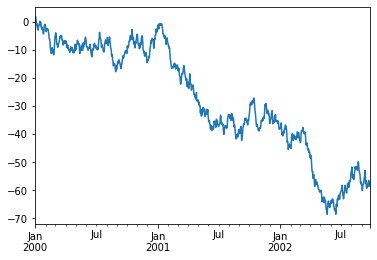

In [170]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
print(ts)
ts = ts.cumsum()  #累加
print(ts)
ts.plot()

DataFrame 的 plot() 方法可以快速绘制所有带标签的列：

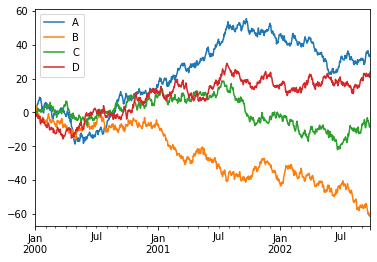

In [172]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

## 数据输入 / 输出

In [173]:
df

,A,B,C,D
2000-01-01,0.210972,0.101694,-0.016658,-0.591807
2000-01-02,-0.001482,0.345529,0.325609,-2.450211
2000-01-03,1.151839,2.702451,-0.162050,-1.801245
2000-01-04,3.171220,2.790512,-0.367372,-1.344589
2000-01-05,2.766653,3.677963,0.048706,-1.349211
...,...,...,...,...
2002-09-22,34.220343,-60.615994,-6.327267,21.885286
2002-09-23,33.190906,-59.841410,-6.667934,21.306380
2002-09-24,33.976050,-60.600653,-8.620723,21.542134
2002-09-25,32.964512,-61.425709,-8.714085,20.625743


In [174]:
df.to_csv('test.csv')

In [176]:
df2 = pd.read_csv('test.csv')
df2

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.210972,0.101694,-0.016658,-0.591807
1,2000-01-02,-0.001482,0.345529,0.325609,-2.450211
2,2000-01-03,1.151839,2.702451,-0.162050,-1.801245
3,2000-01-04,3.171220,2.790512,-0.367372,-1.344589
4,2000-01-05,2.766653,3.677963,0.048706,-1.349211
...,...,...,...,...,...
995,2002-09-22,34.220343,-60.615994,-6.327267,21.885286
996,2002-09-23,33.190906,-59.841410,-6.667934,21.306380
997,2002-09-24,33.976050,-60.600653,-8.620723,21.542134
998,2002-09-25,32.964512,-61.425709,-8.714085,20.625743


In [177]:
df.to_excel('test2.xlsx', sheet_name='Sheet1')

In [178]:
df3 = pd.read_excel('test2.xlsx', sheet_name='Sheet1')
df3

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.210972,0.101694,-0.016658,-0.591807
1,2000-01-02,-0.001482,0.345529,0.325609,-2.450211
2,2000-01-03,1.151839,2.702451,-0.162050,-1.801245
3,2000-01-04,3.171220,2.790512,-0.367372,-1.344589
4,2000-01-05,2.766653,3.677963,0.048706,-1.349211
...,...,...,...,...,...
995,2002-09-22,34.220343,-60.615994,-6.327267,21.885286
996,2002-09-23,33.190906,-59.841410,-6.667934,21.306380
997,2002-09-24,33.976050,-60.600653,-8.620723,21.542134
998,2002-09-25,32.964512,-61.425709,-8.714085,20.625743
